# Wordle Solver

Observing different data sets

In [45]:
import pandas as pd
import math
import random
import heapq
from itertools import product
import collections
import pickle


data = pd.read_csv('new_possible_words.txt')

df = pd.DataFrame(data)

words_list = df['Possible_words']

allowed_data = pd.read_csv('Allowed_words.txt')

all_df = pd.DataFrame(allowed_data)

allowed_words = all_df['Allowed']


In [46]:
game_words = words_list
words_list = set(words_list)
allowed_words = set(allowed_words)
n = len(words_list)
n

2315

In [35]:
chars = [0,1,2]
possible_results = []
for i in product(chars,repeat = 5):
    possible_results.append(i)

In [36]:
possible_results = [list(i) for i in possible_results]
possible_results

[[0, 0, 0, 0, 0],
 [0, 0, 0, 0, 1],
 [0, 0, 0, 0, 2],
 [0, 0, 0, 1, 0],
 [0, 0, 0, 1, 1],
 [0, 0, 0, 1, 2],
 [0, 0, 0, 2, 0],
 [0, 0, 0, 2, 1],
 [0, 0, 0, 2, 2],
 [0, 0, 1, 0, 0],
 [0, 0, 1, 0, 1],
 [0, 0, 1, 0, 2],
 [0, 0, 1, 1, 0],
 [0, 0, 1, 1, 1],
 [0, 0, 1, 1, 2],
 [0, 0, 1, 2, 0],
 [0, 0, 1, 2, 1],
 [0, 0, 1, 2, 2],
 [0, 0, 2, 0, 0],
 [0, 0, 2, 0, 1],
 [0, 0, 2, 0, 2],
 [0, 0, 2, 1, 0],
 [0, 0, 2, 1, 1],
 [0, 0, 2, 1, 2],
 [0, 0, 2, 2, 0],
 [0, 0, 2, 2, 1],
 [0, 0, 2, 2, 2],
 [0, 1, 0, 0, 0],
 [0, 1, 0, 0, 1],
 [0, 1, 0, 0, 2],
 [0, 1, 0, 1, 0],
 [0, 1, 0, 1, 1],
 [0, 1, 0, 1, 2],
 [0, 1, 0, 2, 0],
 [0, 1, 0, 2, 1],
 [0, 1, 0, 2, 2],
 [0, 1, 1, 0, 0],
 [0, 1, 1, 0, 1],
 [0, 1, 1, 0, 2],
 [0, 1, 1, 1, 0],
 [0, 1, 1, 1, 1],
 [0, 1, 1, 1, 2],
 [0, 1, 1, 2, 0],
 [0, 1, 1, 2, 1],
 [0, 1, 1, 2, 2],
 [0, 1, 2, 0, 0],
 [0, 1, 2, 0, 1],
 [0, 1, 2, 0, 2],
 [0, 1, 2, 1, 0],
 [0, 1, 2, 1, 1],
 [0, 1, 2, 1, 2],
 [0, 1, 2, 2, 0],
 [0, 1, 2, 2, 1],
 [0, 1, 2, 2, 2],
 [0, 2, 0, 0, 0],
 [0, 2, 0,

This function is used to retrieve the list of words.

input: none

output: set of words

In [37]:
def get_words():
    data = pd.read_csv('possible_words.txt')
    df = pd.DataFrame(data)
    words = df['Possible_words']
    words = set(words)
    return words
    

0 - Grey
1 - Yellow
2 - Green

In [38]:
def wordle_output(value,answer):
    res = [0]*5
    count = collections.Counter(answer)
    for i in range(5):
        if value[i] == answer[i]:
            res[i] = 2
            count[value[i]] -= 1
    for i in range(5):
        if res[i] == 0 and value[i] in count and count[value[i]] != 0:
            count[value[i]] -= 1
            res[i] = 1
    return res



In [39]:
def information(value,result,words):
    new_possible_answers = set()
    for word in words:
        if wordle_output(value,word) == result:
            new_possible_answers.add(word)
    prob = len(new_possible_answers)/len(words)
    if prob != 0:
        info = (-1)*(math.log2(prob))
    return prob,new_possible_answers              

In [40]:
def expected_information(value,words):
    ent = 0
    for result in possible_results:
        prob,lex = information(value,result,words)
        if prob != 0:
            ent += (-1)*prob*(math.log2(prob))
    return ent      

In [41]:
def next_guess(words):
    possible_guesses = set()
    ent_all_words = collections.defaultdict(set)
    minHeap = []
    if len(words) == 1:
        return words.pop()
    for w in words_list:
        ent = expected_information(w,words)
        ent = round(ent,3)
        ent_all_words[ent].add(w)
        heapq.heappush(minHeap, -ent)
    e = heapq.heappop(minHeap)
    g = words & ent_all_words[-e]
    if g: return g.pop()
    return ent_all_words[-e].pop()


In [47]:
best = []
for w in words_list:
    best.append((expected_information(w,words_list),w))


In [48]:
best.sort(reverse = True)
best

[(5.8779096908214905, 'raise'),
 (5.855775376955974, 'slate'),
 (5.834874004263529, 'crate'),
 (5.831396980440793, 'irate'),
 (5.830548713859451, 'trace'),
 (5.820939700886009, 'arise'),
 (5.807280035160933, 'stare'),
 (5.770088860457013, 'snare'),
 (5.767796702404358, 'arose'),
 (5.751645645679275, 'least'),
 (5.74583655094462, 'alert'),
 (5.742781744697191, 'crane'),
 (5.7385726717905, 'stale'),
 (5.733713267350097, 'saner'),
 (5.713170728077574, 'alter'),
 (5.706088957294794, 'later'),
 (5.696353951200051, 'react'),
 (5.684573501404138, 'leant'),
 (5.6815608695825155, 'trade'),
 (5.656074382048378, 'learn'),
 (5.646714898485088, 'cater'),
 (5.6451934500610745, 'roast'),
 (5.636827622829476, 'aisle'),
 (5.634236581503799, 'trice'),
 (5.630489493703493, 'scare'),
 (5.6296910035901, 'parse'),
 (5.620200903567962, 'saute'),
 (5.614518956629301, 'heart'),
 (5.614035882733979, 'alone'),
 (5.610465734674024, 'store'),
 (5.6095337891796975, 'alien'),
 (5.608309347595913, 'share'),
 (5.60408

In [118]:
import time

In [ ]:
look_up = {}
for word in words_list:
    start = time.time()
    look_up[word] = {}
    for result in possible_results:
        prob,words = information(word,result,words_list)
        if len(words) > 0:
            guess = next_guess(words)
            look_up[word][tuple(result)] = [guess,words]
    print(word,time.time()-start)

    

In [ ]:
pickle.dump( look_up, open( "guess1.pkl", "wb" ) )

In [110]:
file = open('guess1.pkl','rb')
look_up = pickle.load(file)

In [67]:
# look_up_guess2 = {}
# guess,words = look_up[(0,0,0,0,0)]
# prob,words = information(guess,[0,0,0,0,0],words)
# if len(words) > 0:
#     guess = next_guess(words)
#     look_up_guess2[(0,0,0,0,0)] = [guess,words]
# pickle.dump( look_up_guess2, open( "guess2.pkl", "wb" ) )

{'boozy', 'known', 'downy', 'foggy', 'dowdy', 'goofy', 'dodgy', 'toddy', 'booty', 'booby', 'poppy', 'woody', 'bongo', 'goody', 'woozy', 'bobby'}


{(0, 0, 0, 0, 0): ['goody',
  {'bobby',
   'bongo',
   'booby',
   'booty',
   'boozy',
   'dodgy',
   'dowdy',
   'downy',
   'foggy',
   'goody',
   'goofy',
   'known',
   'poppy',
   'toddy',
   'woody',
   'woozy'}]}

In [109]:
file = open('guess2.pkl','rb')
look_up_guess2 = pickle.load(file)

The function below is a test bot to play wordle on a random word and try to return the score based on the number of guesses

In [12]:
def test_bot(answer = " "):
    words = get_words()
    if answer == " ":
        answer = random.choices(game_words, k=1)[0]
    score = 0
    guess = 'raise'
    for i in range(5):
        res = wordle_output(guess,answer)
        if res == [2,2,2,2,2]:
            print("Score",i+1,answer)
            return i+1
        if i == 0:
            guess,words = look_up[tuple(res)]
        else:
            prob,words = information(guess,res,words)
            guess = next_guess(words)

    print("The answer is:",answer)
    print('Failed')
    return 99

Demonstration of the test_bot

In [13]:
test_bot('block')

Score 4 block


4

In [84]:
avg_score = 0

for i in range(100):
    avg_score += test_bot()
print(avg_score/100)

Score 3 brick
Score 5 foyer
Score 4 sheet
Score 3 abbot
Score 4 chair
Score 3 shalt
Score 4 craft
Score 3 liken
Score 4 vivid
Score 2 sepia
Score 3 copse
Score 5 krill
Score 4 dealt
Score 3 ditto
Score 4 using
Score 3 islet
Score 3 space
Score 4 agate
Score 3 gloom
Score 3 blind
Score 4 wield
Score 4 harpy
Score 4 clasp
Score 3 drawn
Score 3 piano
Score 3 lefty
Score 5 hilly
Score 3 slash
Score 3 reach
Score 4 local
Score 4 token
Score 3 feral
Score 4 petty
Score 3 worse
Score 3 spunk
Score 3 haute
Score 4 ditch
Score 3 creep
Score 4 golem
Score 3 dwell
Score 5 dilly
Score 3 abase
Score 4 drier
Score 4 blurb
Score 3 radar
Score 4 cinch
Score 3 lasso
Score 3 plumb
Score 4 piney
Score 4 lanky
Score 3 lurch
Score 3 hazel
Score 4 milky
Score 3 bacon
Score 3 dance
Score 4 drink
Score 3 pixel
Score 3 decoy
Score 5 buyer
Score 3 infer
Score 4 timid
Score 3 steal
Score 3 dairy
Score 4 toddy
Score 4 sumac
Score 4 gazer
Score 3 qualm
Score 4 speck
Score 4 night
Score 4 mimic
Score 3 radii
Score 

The below function is used to play the wordle on the official site it shows you the guess to pick

inputs: value - our previous guess, result - output for our guess, words - set of words

output: prints the word to try in the next guess, words - updates set of words 

In [116]:
# words = get_words()
prob,words = information('venue',[0,1,0,1,1],words)
guess = next_guess(words)
print(guess)

queer


In [104]:
def suggest_word(value,result,words,turn):
    if result == [2,2,2,2,2]:
        print("We guessed it!!")
        words = get_words()
        return value,words
    if turn == 1:
        guess,words = look_up[tuple(result)]
    elif result == [0,0,0,0,0] and turn == 2:
        guess,words = look_up_guess2[tuple(result)]
        
    else:
        prob,words = information(value,result,words)
        guess = next_guess(words)
    print("Try this word:",guess)
    return guess,words

The below is demonstration with the official wordle game

In [105]:
words = get_words()
guess = 'raise'

Use 0 - Grey 1- Yellow 2- Green

In [106]:
guess,words = suggest_word(guess,[0,0,0,2,2],words,1)


Try this word: count


In [107]:
guess,words = suggest_word(guess,[0,0,0,1,0],words,2)

Try this word: manly


In [108]:
guess,words = suggest_word(guess,[2,2,2,0,0],words,3)

Try this word: manga


In [19]:
guess,words = suggest_word(guess,[0,0,0,0,0],words,4)

Try this word: joker


In [21]:
guess,words = suggest_word(guess,[0,1,0,2,2],words,5)

Try this word: offer


As we can see humid is the correct answer

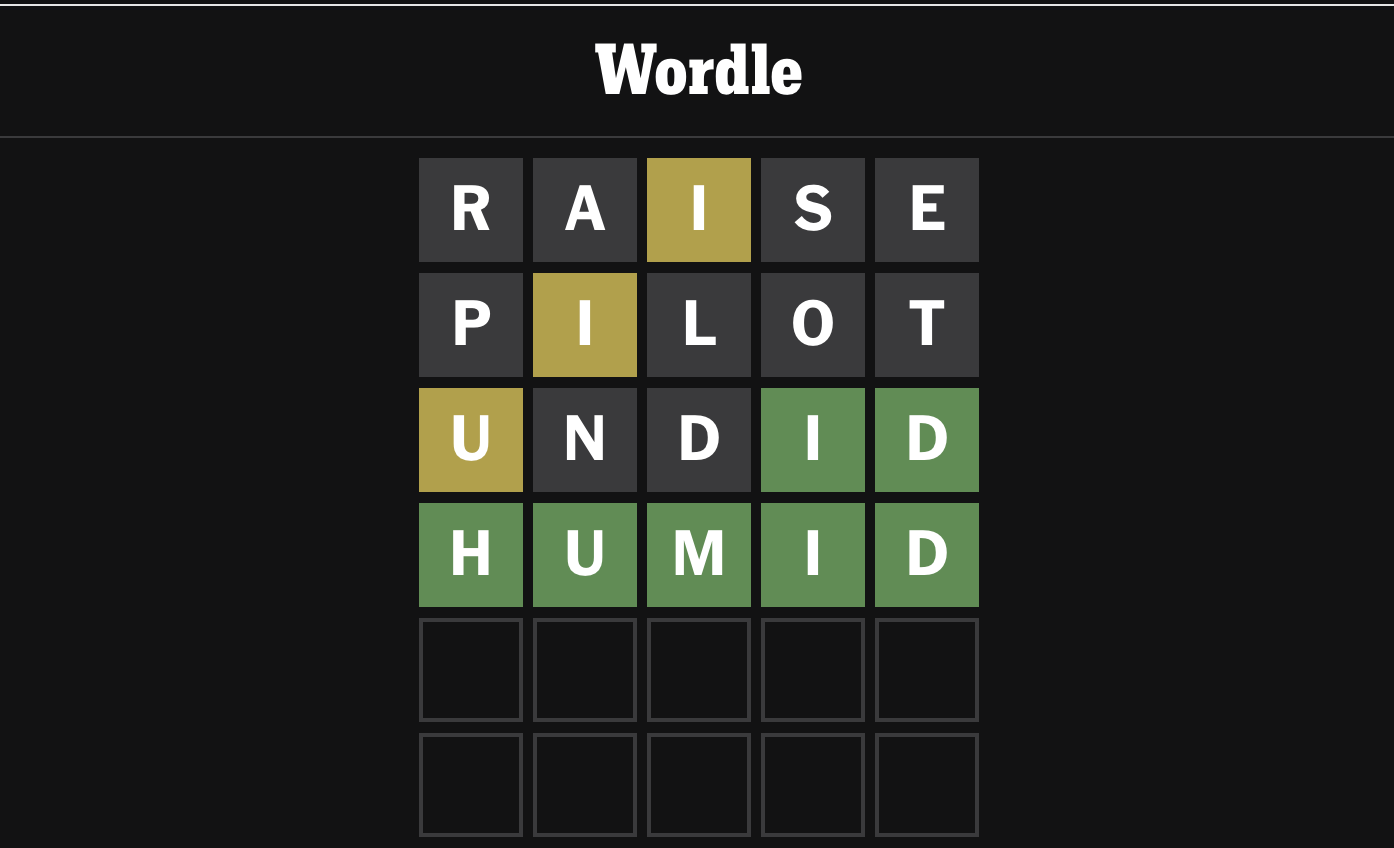

The official game can be played in the site below

https://www.nytimes.com/games/wordle/index.html